## Problem Description and Data

The problem is to do binary classification to detect
metastatic cancer in small image patches taken from larger digital pathology scans. This is a supervised learning problem.
We are provided with labeled training data and unlabeled test data. The Kaggle challenge is to submit a predicted label for each 
test image in the required format.

All of the images are color images (3 channel) with 96 by 96 pixels. 
There are 220025 images in the training data, and 57458 images in the test data.
All of the images have unique filenames like this example: ee1f5345a8d4e28403b7e61b97b5f76c201ce9cb.tif
The labels for the training data are in a separate CSV file train_labels.csv where each row has one image name and the 
corresponding 0/1 label.

The data (images) are all correctly formatted with no missing data. This is a clean data set. No additional cleaning is needed.

### Project Github Repository:
https://github.com/albert-kepner/UCB_Deep_Learning_Cancer_Detection

## Exploratory Data Analysis

In [ ]:
Since all the data are images, there are not obvious ways to summarize the data visually or statistically other than to view a 
few images from this rather large data set.

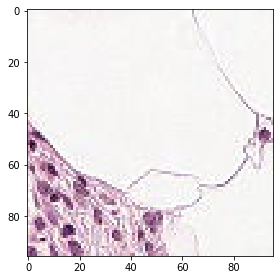

In [2]:
from skimage.io import imread, imshow
sample = ['f38a6374c348f90b587e046aac6079959adf3835.tif',
               'c18f2d887b7ae4f6742ee445113fa1aef383ed77.tif', 
               '755db6279dae599ebb4d39a9123cce439965282d.tif',
               'bc3f0c64fb968ff4a8bd33af6971ecae77c75e08.tif', 
               '068aba587a4950175d04c680d38943fd488d6a9d.tif']
def show_image(filename):
    imshow('data/train/' + filename)
show_image(sample[0])

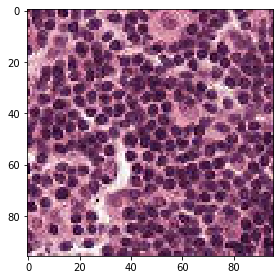

In [3]:
show_image(sample[4])

In [ ]:
## Model Achiticture
I compared 4 different variations of the model achitecture and used the Kaggle scores
to determine empirically which one was working best.

In [ ]:
### Model_1 
I started with a Keras model patterned after a similar model in Chapter 14, p. 461 of the Book 
"Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow" by Aurelien Geron. This model
has alterate convolution and max pooling layers followed by 3 dense layers with 50% dropout
between the densse layers.

Having alternate convolution and max pooling layers followed by dense layers of declining size
seems to be a standard practice for computer vision classification problems with neural networks.
The convolution layers detect successively more complex visual features. The max pooling layers
help reduce the number of training parameters and help with detecting the strongest features.
The dense layers add flexibility to detect combinations of visual features.
The dropout layers are added for regularization to help prevent overfitting.

In [ ]:
from tensorflow import keras

def modelArch1():
    model = keras.models.Sequential([
        keras.layers.Conv2D(64, 3, activation='relu', padding='valid',
                           input_shape=[96,96,3]),
        keras.layers.MaxPool2D(2),
        keras.layers.Conv2D(128, 3, activation=tf.nn.relu, padding='valid'),
        keras.layers.Conv2D(128, 3,activation=tf.nn.relu, padding='valid'),
        keras.layers.MaxPool2D(2),
        keras.layers.Conv2D(256, 3, activation=tf.nn.relu, padding='valid'),
        keras.layers.Conv2D(256, 3, activation=tf.nn.relu, padding='valid'),
        keras.layers.MaxPool2D(2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(64,  activation=tf.nn.relu),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation=tf.nn.sigmoid),
    ])
    return model

model = modelArch1()
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.0005)
loss = keras.losses.BinaryCrossentropy()
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [ ]:
### Model_2
This model was modified from Model_1 by reducing the number of filters by a factor of
two in the 5 convolution layers.

In [ ]:
from tensorflow import keras

def modelArch2():
    model = keras.models.Sequential([
        keras.layers.Conv2D(32, 3, activation='relu', padding='valid',
                           input_shape=[96,96,3]),
        keras.layers.MaxPool2D(2),
        keras.layers.Conv2D(64, 3, activation=tf.nn.relu, padding='valid'),
        keras.layers.Conv2D(64, 3,activation=tf.nn.relu, padding='valid'),
        keras.layers.MaxPool2D(2),
        keras.layers.Conv2D(128, 3, activation=tf.nn.relu, padding='valid'),
        keras.layers.Conv2D(128, 3, activation=tf.nn.relu, padding='valid'),
        keras.layers.MaxPool2D(2),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32,  activation=tf.nn.relu),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation=tf.nn.sigmoid),
    ])
    return model

model = modelArch2()
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.00020)
loss = keras.losses.BinaryCrossentropy()
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [ ]:
### Model_3
This model was modified from Model 2 by adding batch normalization after each of the
5 convolution layers.

In [ ]:
def modelArch3():
    model = keras.models.Sequential([
        keras.layers.Conv2D(32, 3, activation='relu', padding='valid',
                           input_shape=[96,96,3]),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(2),
        keras.layers.Conv2D(64, 3, activation=tf.nn.relu, padding='valid'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(64, 3,activation=tf.nn.relu, padding='valid'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(2),
        keras.layers.Conv2D(128, 3, activation=tf.nn.relu, padding='valid'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(128, 3, activation=tf.nn.relu, padding='valid'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(2),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32,  activation=tf.nn.relu),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation=tf.nn.sigmoid),
    ])
    return model

model = modelArch3()
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.00020)
loss = keras.losses.BinaryCrossentropy()
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [ ]:
### Model_4
This model was modified from Model 2 by removing 2 of the convolution layers, and futher recuding the number of filters.

In [ ]:
from tensorflow import keras

def modelArch4():
    model = keras.models.Sequential([
        keras.layers.Conv2D(32, 3, activation='relu', padding='valid',
                           input_shape=[96,96,3]),
        keras.layers.MaxPool2D(2),
        keras.layers.Conv2D(48, 3, activation=tf.nn.relu, padding='valid'),
        keras.layers.MaxPool2D(2),
        keras.layers.Conv2D(64, 3, activation=tf.nn.relu, padding='valid'),
        keras.layers.MaxPool2D(2),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32,  activation=tf.nn.relu),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation=tf.nn.sigmoid),
    ])
    return model

model = modelArch4()
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.00020)
loss = keras.losses.BinaryCrossentropy()
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])